In [15]:
import numpy as np
import numpy.linalg as alg


def regression_k_voisins(samples, k, input):
    toto = sorted(samples, key=lambda sample: alg.norm(sample[0]-input))[:k]
    toto = [x[1] for x in toto]
    return np.mean(toto)


def classification_k_voisins(samples, k, input):
    toto = sorted(samples, key=lambda sample: alg.norm(sample[0]-input))[:k]
    toto = [x[1] for x in toto]
    return np.mean(toto)


In [16]:
import numpy.random as rd

s1 = [(x, 'A') for x in rd.normal([1., 4.], 1., (50, 2))]
s2 = [(x, 'B') for x in rd.normal([4., 3.], 1., (50, 2))]
s3 = [(x, 'C') for x in rd.normal([1., 0.], 1., (50, 2))]
input = [2, 2]
k = 10
n = sorted(s1+s2+s3, key=lambda sample: alg.norm(sample[0]-input))[:k]
#regression_k_voisins(s1+s2, k, input)
n


[(array([2.00912871, 2.30885074]), 'B'),
 (array([2.10443421, 2.36001034]), 'A'),
 (array([1.95346547, 2.53731611]), 'C'),
 (array([2.18217101, 2.51049975]), 'B'),
 (array([1.47316218, 1.81279858]), 'A'),
 (array([1.53520395, 1.38248983]), 'C'),
 (array([1.20525449, 1.80609337]), 'A'),
 (array([2.38709457, 1.26906411]), 'C'),
 (array([1.19274264, 1.47823488]), 'C'),
 (array([1.64150145, 2.91458545]), 'A')]

In [17]:
sorted([(1, 4), (3, 2), (2, 3), (2, 8)])


[(1, 4), (2, 3), (2, 8), (3, 2)]

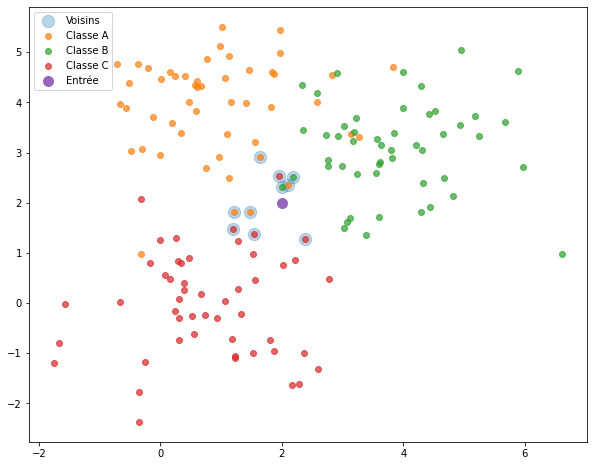

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter([x[0][0] for x in n], [x[0][1]
            for x in n], label='Voisins', alpha=.3, s=150.)
plt.scatter([x[0][0] for x in s1], [x[0][1]
            for x in s1], label='Classe '+s1[0][1], alpha=.7)
plt.scatter([x[0][0] for x in s2], [x[0][1]
            for x in s2], label='Classe '+s2[0][1], alpha=.7)
plt.scatter([x[0][0] for x in s3], [x[0][1]
            for x in s3], label='Classe '+s3[0][1], alpha=.7)
plt.scatter(input[0], input[1], label='Entrée', s=100.)
plt.legend()


In [19]:
c = [x[1] for x in n]
d = {k: c.count(k) for k in ('A', 'B', 'C')}
[k for k in d if d[k] == max(d.values())]


['A', 'C']

In [20]:
c = [x[1] for x in n]
for k in 'A', 'B', 'C':
    print("Nombre de voisins de classe "+k+" : "+str(c.count(k)))


Nombre de voisins de classe A : 4
Nombre de voisins de classe B : 2
Nombre de voisins de classe C : 4


In [21]:
def voisins(entree, donnees, k):
    return sorted(donnees, key=lambda d: alg.norm(d[0]-entree))[:k]


def vote(classes):
    d = {c: classes.count(c) for c in classes}
    return [c for c in d if d[c] == max(d.values())]


def classification(entree, donnees, k):
    v = voisins(entree, donnees, k)
    return vote([x[1] for x in v])


In [22]:
classeA = [classification(entree, s1+s2+s3, 15)[0] for entree, _ in s1]
classeB = [classification(entree, s1+s2+s3, 15)[0] for entree, _ in s2]
classeC = [classification(entree, s1+s2+s3, 15)[0] for entree, _ in s3]
for c in classeA, classeB, classeC:
    print([c.count(cc) for cc in ('A', 'B', 'C')])


[43, 5, 2]
[2, 48, 0]
[1, 1, 48]
